In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Data-Analysis-Projects/COVID-19')
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/Data-Analysis-Projects/COVID-19


## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing dataset

In [0]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

## View information about the dataset.

In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              25979 non-null  int64  
 1   Province_State  11039 non-null  object 
 2   Country_Region  25979 non-null  object 
 3   Date            25979 non-null  object 
 4   ConfirmedCases  25979 non-null  float64
 5   Fatalities      25979 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ MB


In [6]:
train_dataset.describe()

,Id,ConfirmedCases,Fatalities
count,25979.000000,25979.000000,25979.000000
mean,17826.000000,1128.434851,58.169252
std,10300.679697,8252.496072,660.659625
min,1.000000,0.000000,0.000000
25%,8913.500000,0.000000,0.000000
50%,17826.000000,1.000000,0.000000
75%,26738.500000,108.000000,1.000000
max,35651.000000,195749.000000,20465.000000


In [7]:
train_dataset.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [8]:
test_dataset.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-04-02
1,2,NaN,Afghanistan,2020-04-03
2,3,NaN,Afghanistan,2020-04-04
3,4,NaN,Afghanistan,2020-04-05
4,5,NaN,Afghanistan,2020-04-06


In [9]:
train_dataset.isna().sum()

Id                    0
Province_State    14940
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [10]:
test_dataset.isna().sum()

ForecastId           0
Province_State    7740
Country_Region       0
Date                 0
dtype: int64

In [0]:
train_dataset['Province_State'].fillna('', inplace = True)
test_dataset['Province_State'].fillna('', inplace = True)

In [0]:
train_dataset['Country_Region'] = train_dataset['Country_Region'] + ' ' + train_dataset['Province_State']
test_dataset['Country_Region'] = test_dataset['Country_Region'] + ' ' + test_dataset['Province_State']
del train_dataset['Province_State']
del test_dataset['Province_State']

In [13]:
train_dataset.head()

,Id,Country_Region,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,2020-01-22,0.0,0.0
1,2,Afghanistan,2020-01-23,0.0,0.0
2,3,Afghanistan,2020-01-24,0.0,0.0
3,4,Afghanistan,2020-01-25,0.0,0.0
4,5,Afghanistan,2020-01-26,0.0,0.0


In [14]:
test_dataset.head()

,ForecastId,Country_Region,Date
0,1,Afghanistan,2020-04-02
1,2,Afghanistan,2020-04-03
2,3,Afghanistan,2020-04-04
3,4,Afghanistan,2020-04-05
4,5,Afghanistan,2020-04-06


In [15]:
# How many countries
train_dataset['Country_Region'].describe()

count       25979
unique        313
top       Serbia 
freq           83
Name: Country_Region, dtype: object

In [0]:
country_list = train_dataset['Country_Region'].unique()

In [17]:
top_comfirmedcases = train_dataset[train_dataset.Date == '2020-04-13'].sort_values(by = 'ConfirmedCases', ascending = False)
top_comfirmedcases.head(10)

,Id,Country_Region,Date,ConfirmedCases,Fatalities
22492,30863,US New York,2020-04-13,195749.0,10058.0
18508,25391,Spain,2020-04-13,170099.0,17756.0
12200,16727,Italy,2020-04-13,159516.0,20465.0
10291,14105,France,2020-04-13,136779.0,14967.0
10623,14561,Germany,2020-04-13,130072.0,3194.0
20500,28127,US Florida,2020-04-13,123019.0,499.0
25314,34739,United Kingdom,2020-04-13,88621.0,11329.0
11868,16271,Iran,2020-04-13,73303.0,4585.0
5643,7721,China Hubei,2020-04-13,67803.0,3221.0
22326,30635,US New Jersey,2020-04-13,64584.0,2443.0


In [18]:
train_date = train_dataset.Date.unique()
train_date

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

In [19]:
test_date = test_dataset.Date.unique()
test_date

array(['2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
       '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
       '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
       '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
       '2020-05-12', '2020-05-13', '2020-05-14'], dtype=object)

In [20]:
train_days = np.arange(len(train_date))
train_days

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [21]:
train_days[train_date == '2020-04-02']

array([71])

In [0]:
test_days = np.arange(len(test_date)) + 71

In [23]:
test_days

array([ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113])

In [0]:
train_end = train_days[-1]
test_start = test_days[0]

In [25]:
train_end

82

In [26]:
test_start

71

In [0]:
Day = np.zeros(len(train_dataset))
for ii in range(len(train_date)):
    Day[train_dataset.Date == train_date[ii]] = train_days[ii]
train_dataset['Day'] = Day

In [28]:
train_dataset.head(10)

,Id,Country_Region,Date,ConfirmedCases,Fatalities,Day
0,1,Afghanistan,2020-01-22,0.0,0.0,0.0
1,2,Afghanistan,2020-01-23,0.0,0.0,1.0
2,3,Afghanistan,2020-01-24,0.0,0.0,2.0
3,4,Afghanistan,2020-01-25,0.0,0.0,3.0
4,5,Afghanistan,2020-01-26,0.0,0.0,4.0
5,6,Afghanistan,2020-01-27,0.0,0.0,5.0
6,7,Afghanistan,2020-01-28,0.0,0.0,6.0
7,8,Afghanistan,2020-01-29,0.0,0.0,7.0
8,9,Afghanistan,2020-01-30,0.0,0.0,8.0
9,10,Afghanistan,2020-01-31,0.0,0.0,9.0


In [0]:
Day = np.zeros(len(test_dataset))
for ii in range(len(test_date)):
    Day[test_dataset.Date == test_date[ii]] = test_days[ii]
test_dataset['Day'] = Day

In [30]:
test_dataset.head(10)

,ForecastId,Country_Region,Date,Day
0,1,Afghanistan,2020-04-02,71.0
1,2,Afghanistan,2020-04-03,72.0
2,3,Afghanistan,2020-04-04,73.0
3,4,Afghanistan,2020-04-05,74.0
4,5,Afghanistan,2020-04-06,75.0
5,6,Afghanistan,2020-04-07,76.0
6,7,Afghanistan,2020-04-08,77.0
7,8,Afghanistan,2020-04-09,78.0
8,9,Afghanistan,2020-04-10,79.0
9,10,Afghanistan,2020-04-11,80.0


In [135]:
country = 'Spain '
train_dataset[train_dataset['Country_Region'] == country].head()

,Id,Country_Region,Date,ConfirmedCases,Fatalities,Day
18426,25309,Spain,2020-01-22,0.0,0.0,0.0
18427,25310,Spain,2020-01-23,0.0,0.0,1.0
18428,25311,Spain,2020-01-24,0.0,0.0,2.0
18429,25312,Spain,2020-01-25,0.0,0.0,3.0
18430,25313,Spain,2020-01-26,0.0,0.0,4.0


In [0]:
train = train_dataset[train_dataset['Country_Region'] == country]
test = test_dataset[test_dataset['Country_Region'] == country]

# X_train
x_train = train.Day.values
cases_train = train.ConfirmedCases.values
fatality_train = train.Fatalities.values

# X_test
x_test = test.Day.values

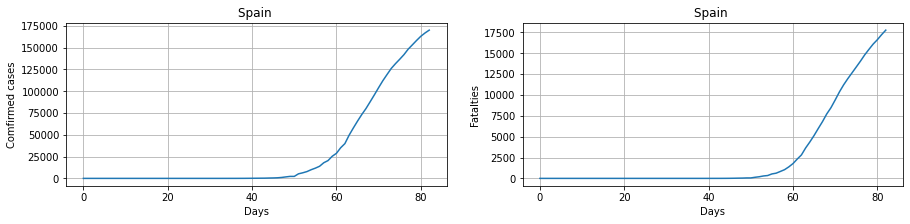

In [137]:
plt.figure(figsize = (15, 3))
plt.subplot(1, 2, 1)
plt.xlabel('Days')
plt.ylabel('Comfirmed cases')
plt.title(country)
plt.plot(x_train, cases_train)
plt.grid()

plt.subplot(1, 2, 2)
plt.xlabel('Days')
plt.ylabel('Fatalties')
plt.title(country)
plt.plot(x_train, fatality_train)
plt.grid()

plt.show()

## Gompertz model

In [0]:
def Gompertz(t, theta1, theta2, theta3):
    '''
    theta1: The asymptote.
    theta2: The displacement along the x-axis.
    theta3: The growth rate.
    '''
    f = theta1 * np.exp(-theta2 * np.exp(-theta3 * t))
    return f

## Least squared estimation

In [0]:
popt, pcov = curve_fit(f = Gompertz, 
                       xdata = x_train, 
                       ydata = cases_train, 
                       p0 = [3 * max(cases_train), 1, 1])

In [139]:
popt

array([2.17305212e+05, 5.92177406e+02, 9.53981967e-02])

In [140]:
pcov

array([[ 5.37929696e+06, -1.07287532e+05, -3.15529043e+00],
       [-1.07287532e+05,  2.52710189e+03,  7.24287084e-02],
       [-3.15529043e+00,  7.24287084e-02,  2.08586900e-06]])

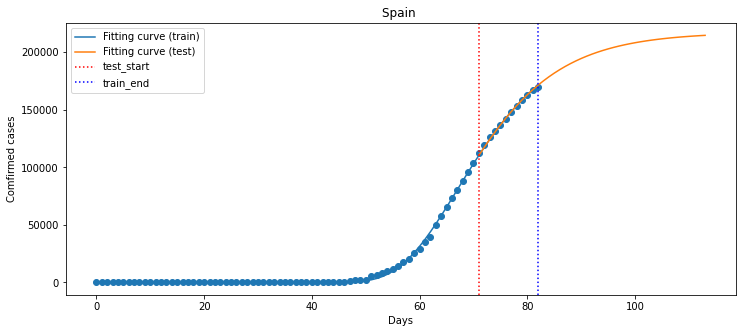

In [141]:
plt.figure(figsize = (12, 5))
plt.xlabel('Days')
plt.ylabel('Comfirmed cases')
plt.title(country)
plt.scatter(x_train, cases_train)
plt.plot(x_train, Gompertz(x_train, *popt), label = 'Fitting curve (train)')
plt.plot(x_test, Gompertz(x_test, *popt), label = 'Fitting curve (test)')
plt.axvline(x = test_start, color = 'r', linestyle = ':', label = 'test_start')
plt.axvline(x = train_end, color = 'b', linestyle = ':', label = 'train_end')
plt.legend()

plt.show()

## Maximum likelihood estomator

[2.7. Mathematical optimization: finding minima of functions](https://scipy-lectures.org/advanced/mathematical_optimization/index.html)

[Issue recovering inverse Hessian from minimize()](https://github.com/rickecon/StructEst_W17/issues/26)

'L-BFGS-B'

'TNC'

'SLSQP'

In [0]:
# Minimize the negative log-lokelihood function
from scipy.optimize import minimize
def Gompertz_reg(x, y, sigma_2 = 1):
    N = len(y)
    def Gompertz(t, theta1, theta2, theta3):
        f = theta1 * np.exp(-theta2 * np.exp(-theta3 * t))
        return f

    # Negative log-likelihood
    def l_fun(params): 
        theta1 = np.exp(params[0])
        theta2 = np.exp(params[1])
        theta3 = np.exp(params[2])
        ll = -(N/2) * np.log(2 * np.pi) - (N/2) * np.log(sigma_2) - (1/(2 * sigma_2)) * np.sum((y - Gompertz(x, theta1, theta2, theta3)) ** 2)
        return -ll

    p0 = [np.log(3 * max(y)), 0, 0]
    res = minimize(fun = l_fun, x0 = p0, method = 'L-BFGS-B')
    ML = -res.fun
    DF = len(res.x)
    V = res.hess_inv.todense()
    # H = -np.linalg.inv(V)

    # AIC, BIC, LCV
    LCV = ML - DF
    AIC = 2 * DF - 2 * ML
    BIC = np.log(N) * DF - 2 * ML
    convergence_res = {'ML': ML,
                       'DF': DF, 
                       'LCV': LCV,
                       'AIC': AIC, 
                       'BIC': BIC, 
                       'nfev': res.nfev, 
                       'nit': res.nit, 
                       'status': res.status}    

    # Estimator
    est = np.exp(res.x)

    # Covariance matrix of estimator
    est_var = np.matmul(np.diag(est), V)
    est_var = np.matmul(est_var, np.diag(est))

    '''
    V = np.matmul(np.diag(1 / est), est_var)
    V = np.matmul(V, np.diag(1 / est))
    '''

    # Estimate of parameters
    # Estimator
    theta1_est = est[0] 
    theta2_est = est[1]
    theta3_est = est[2]

    # Standard error
    theta1_se = theta1_est * np.sqrt(np.diag(V)[0])
    theta2_se = theta2_est * np.sqrt(np.diag(V)[1])
    theta3_se = theta3_est * np.sqrt(np.diag(V)[2])

    # 95% CI Lower bound
    theta1_Lower = theta1_est * np.exp(-1.96 * np.sqrt(np.diag(V)[0]))
    theta2_Lower = theta2_est * np.exp(-1.96 * np.sqrt(np.diag(V)[1]))
    theta3_Lower = theta3_est * np.exp(-1.96 * np.sqrt(np.diag(V)[2]))

    # 95% CI Upper bound
    theta1_Upper = theta1_est * np.exp(1.96 * np.sqrt(np.diag(V)[0]))
    theta2_Upper = theta2_est * np.exp(1.96 * np.sqrt(np.diag(V)[1]))
    theta3_Upper = theta3_est * np.exp(1.96 * np.sqrt(np.diag(V)[2]))

    # Results
    # theta1
    theta1_res = {'Estimate': theta1_est, 
                  'SE': theta1_se, 
                  'Lower': theta1_Lower, 
                  'Upper': theta1_Upper}
    theta1_res = pd.DataFrame(theta1_res, index = [0])

    # theta2
    theta2_res = {'Estimate': theta2_est, 
                  'SE': theta2_se, 
                  'Lower': theta2_Lower, 
                  'Upper': theta2_Upper}
    theta2_res = pd.DataFrame(theta2_res, index = [0])

    # theta3
    theta3_res = {'Estimate': theta3_est, 
                  'SE': theta3_se, 
                  'Lower': theta3_Lower, 
                  'Upper': theta3_Upper}
    theta3_res = pd.DataFrame(theta3_res, index = [0])

    return est, est_var, theta1_res, theta2_res, theta3_res, convergence_res

In [142]:
est, est_var, theta1_res, theta2_res, theta3_res, convergence_res = \
Gompertz_reg(x = x_train, y = cases_train, sigma_2 = 1)
convergence_res

{'AIC': 93493400.11795552,
 'BIC': 93493407.37447734,
 'DF': 3,
 'LCV': -46746700.05897776,
 'ML': -46746697.05897776,
 'nfev': 288,
 'nit': 49,
 'status': 0}

In [143]:
est

array([2.17305953e+05, 5.92160414e+02, 9.53977071e-02])

In [144]:
popt

array([2.17305212e+05, 5.92177406e+02, 9.53981967e-02])

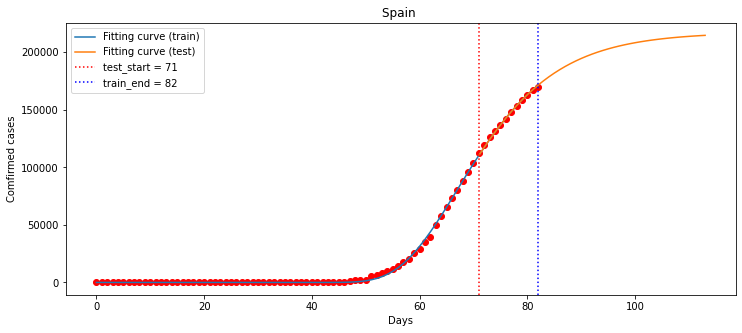

In [145]:
plt.figure(figsize = (12, 5))
plt.xlabel('Days')
plt.ylabel('Comfirmed cases')
plt.title(country)
plt.scatter(x_train, cases_train, color = 'r')
plt.plot(x_train, Gompertz(x_train, *est), label = 'Fitting curve (train)')
plt.plot(x_test, Gompertz(x_test, *est), label = 'Fitting curve (test)')
plt.axvline(x = test_start, color = 'r', linestyle = ':', label = 'test_start = %.f' % (test_start))
plt.axvline(x = train_end, color = 'b', linestyle = ':', label = 'train_end = %.f' % (train_end))
plt.legend()
plt.show()

## Monte Carlo simulation

[scipy.stats.multivariate_normal raising **LinAlgError: singular matrix** even though my covariance matrix is invertible](https://stackoverflow.com/questions/35273908/scipy-stats-multivariate-normal-raising-linalgerror-singular-matrix-even-thou)

In [0]:
from scipy.stats import multivariate_normal
def curve_predict(time, est, est_var):
    t = time
    V = np.diag(1/est) @ est_var @ np.diag(1/est)
    est_tilde = np.log(est)

    def est_fun(params): 
        theta1 = params[0]
        theta2 = params[1]
        theta3 = params[2]
        return Gompertz(t, theta1, theta2, theta3)

    try:
        rv = multivariate_normal(mean = est_tilde, cov = V, allow_singular = True)
    except: 
        print("矩陣不存在反矩陣")

    est_tilde_samples = rv.rvs(size = 1000)
    est_samples = np.exp(est_tilde_samples)
    est_fun_hat = np.array([est_fun(ii) for ii in est_samples])

    Estimate = est_fun(est)
    SE = est_fun_hat.std(axis = 0)
    Lower = np.quantile(a = est_fun_hat, q = 0.025, axis = 0)
    Upper = np.quantile(a = est_fun_hat, q = 0.975, axis = 0)

    result = pd.DataFrame({'Time': t, 
                           'Estimate': Estimate, 
                           'SE': SE, 
                           'Lower': Lower, 
                           'Upper': Upper})
    return result

## Delta method

[AttributeError: 'ArrayBox' object has no attribute 'exp'](https://github.com/HIPS/autograd/issues/416)

[numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)

In [0]:
import autograd.numpy as np
from autograd import jacobian

def curve_predict(time, est, est_var):
    t = time
    def est_fun(params): 
        theta1 = params[0]
        theta2 = params[1]
        theta3 = params[2]
        return Gompertz(t, theta1, theta2, theta3)

    '''
    # f1
    np.exp(-est[1] * np.exp(-est[2] * t))
    # f2
    -est[0] * np.exp(-est[1] * np.exp(-est[2] * t) - est[2] * t)
    # f3
    est[0] * est[1] * t * np.exp(-est[1] * np.exp(-est[2] * t) - est[2] * t)
    '''
    
    J = jacobian(est_fun)(est)
    V = np.diag(J @ est_var @ J.transpose())

    Estimate = est_fun(est)
    SE = np.sqrt(V)
    Lower = Estimate - 1.96 * SE
    Upper = Estimate + 1.96 * SE

    result = pd.DataFrame({'Time': t, 
                           'Estimate': Estimate, 
                           'SE': SE, 
                           'Lower': Lower, 
                           'Upper': Upper})
    return result

In [152]:
result = curve_predict(time = np.arange(0, 113), est = est, est_var = est_var)
result

,Time,Estimate,SE,Lower,Upper
0,0,1.462418e-252,1.185900e+06,0.000000,4.095225e+06
1,1,3.671187e-229,1.185938e+06,0.000000,4.095229e+06
2,2,6.845909e-208,1.185974e+06,0.000000,4.095233e+06
3,3,1.481392e-188,1.186009e+06,0.000000,4.095237e+06
4,4,5.579839e-171,1.186042e+06,0.000000,4.095240e+06
...,...,...,...,...,...
108,108,2.130334e+05,1.149168e+06,13516.267435,4.095554e+06
109,109,2.134186e+05,1.149105e+06,13516.267435,4.095556e+06
110,110,2.137694e+05,1.149046e+06,13516.267435,4.095559e+06
111,111,2.140888e+05,1.148992e+06,13516.267435,4.095561e+06


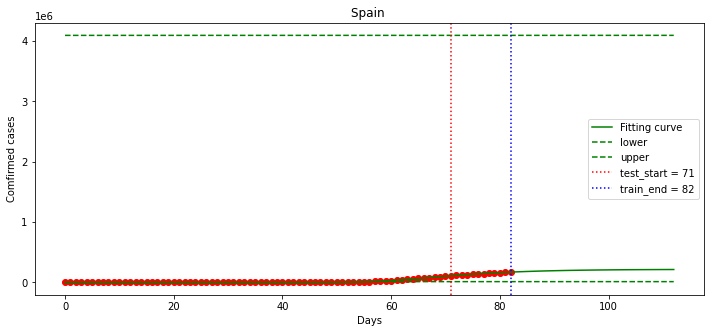

In [153]:
Time = result.Time.values
y_hat = result.Estimate.values
y_lower = result.Lower.values
y_upper = result.Upper.values
y_se = result.SE.values

plt.figure(figsize = (12, 5))
plt.xlabel('Days')
plt.ylabel('Comfirmed cases')
plt.title(country)
plt.scatter(x_train, cases_train, color = 'r')
plt.plot(Time, y_hat, color = 'g', label = 'Fitting curve')
plt.plot(Time, y_lower, color = 'g', linestyle = '--', label = 'lower')
plt.plot(Time, y_upper, color = 'g', linestyle = '--', label = 'upper')
plt.axvline(x = test_start, color = 'r', linestyle = ':', label = 'test_start = %.f' % (test_start))
plt.axvline(x = train_end, color = 'b', linestyle = ':', label = 'train_end = %.f' % (train_end))
plt.legend()
plt.show()

## Note

In [0]:
train = train_dataset.groupby('Date').agg('sum').reset_index()
train['Date']= pd.to_datetime(train['Date'])

In [0]:
train.head(10)

,Date,Id,ConfirmedCases,Fatalities
0,2020-01-22,5566705,554.0,17.0
1,2020-01-23,5567018,653.0,18.0
2,2020-01-24,5567331,939.0,26.0
3,2020-01-25,5567644,1432.0,42.0
4,2020-01-26,5567957,2113.0,56.0
5,2020-01-27,5568270,2922.0,82.0
6,2020-01-28,5568583,5573.0,131.0
7,2020-01-29,5568896,6161.0,133.0
8,2020-01-30,5569209,8229.0,171.0
9,2020-01-31,5569522,9920.0,213.0


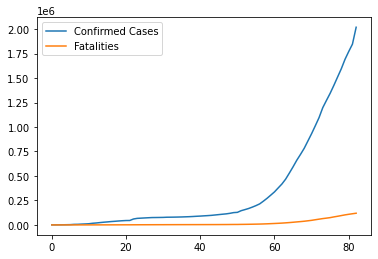

In [0]:
CC = train['ConfirmedCases']
Fa = train['Fatalities']

plt.figure()
plt.plot(CC, label = 'Confirmed Cases')
plt.plot(Fa, label = 'Fatalities')
plt.legend()
plt.show()

In [0]:
China_cases = train_dataset[train_dataset['Country_Region'] == 'China'].groupby('Date').sum().reset_index()
US_cases = train_dataset[train_dataset['Country_Region'] == 'US'].groupby('Date').sum().reset_index()
Japan_cases = train_dataset[train_dataset['Country_Region'] == 'Japan'].groupby('Date').sum().reset_index()
Italy_cases = train_dataset[train_dataset['Country_Region'] == 'Italy'].groupby('Date').sum().reset_index()
Iran_cases = train_dataset[train_dataset['Country_Region'] == 'Iran'].groupby('Date').sum().reset_index()
Spain_cases = train_dataset[train_dataset['Country_Region'] == 'Spain'].groupby('Date').sum().reset_index()
China_cases

,Date,Id,ConfirmedCases,Fatalities
0,2020-01-22,263373,548.0,17.0
1,2020-01-23,263406,643.0,18.0
2,2020-01-24,263439,920.0,26.0
3,2020-01-25,263472,1406.0,42.0
4,2020-01-26,263505,2075.0,56.0
...,...,...,...,...
78,2020-04-09,265947,82883.0,3339.0
79,2020-04-10,265980,82941.0,3340.0
80,2020-04-11,266013,83014.0,3343.0
81,2020-04-12,266046,83134.0,3343.0


In [0]:
x = np.arange(len(China_cases))
y = China_cases['ConfirmedCases'].values

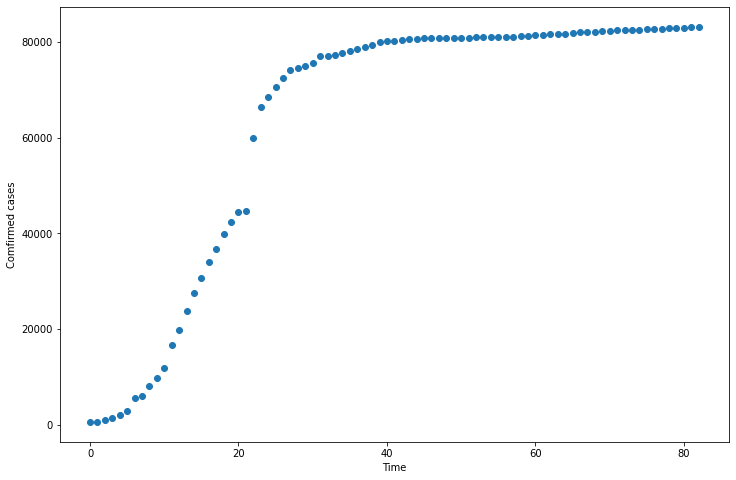

In [0]:
plt.figure(figsize = (12, 8))
plt.xlabel('Time')
plt.ylabel('Comfirmed cases')
# plt.ylabel('Fatalities')
plt.scatter(x, y)
plt.show()

In [0]:
def Gompertz(t, theta1, theta2, theta3):
    f = theta1 * np.exp(-theta2 * np.exp(-theta3 * t))
    return f

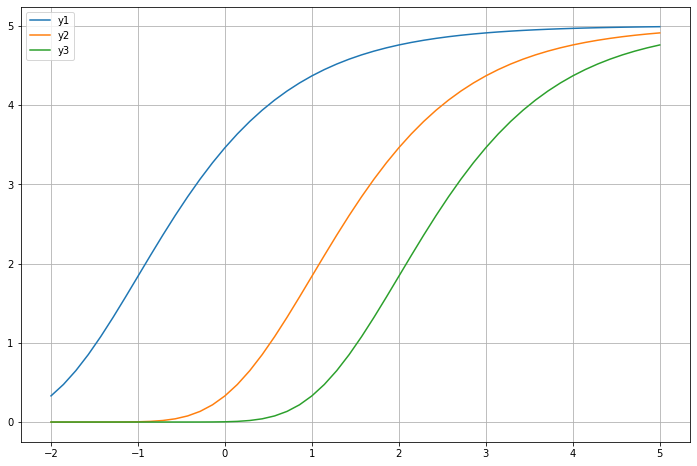

In [0]:
def Gompertz(t, theta1, theta2, theta3, t0):
    f = theta1 * np.exp(-theta2 * np.exp(-theta3 * (t - t0)))
    return f
    
x = np.linspace(start = -2, stop = 5, num = 50)
y1 = Gompertz(x, theta1 = 5, theta2 = 1, theta3 = 1, t0 = -1)
y2 = Gompertz(x, theta1 = 5, theta2 = 1, theta3 = 1, t0 = 1)
y3 = Gompertz(x, theta1 = 5, theta2 = 1, theta3 = 1, t0 = 2)

plt.figure(figsize = (12, 8))
plt.plot(x, y1, label = 'y1')
plt.plot(x, y2, label = 'y2')
plt.plot(x, y3, label = 'y3')
plt.legend()
plt.grid()
plt.show()